<h1 align=center>Stock Analysis</h1>

indicators - lagging or leading? 


[huggingface.co docs](https://huggingface.co/docs/transformers/index) State of the Art Machine Learning for PyTorch, Jax, & TensorFlow

[Financial Modeling Prep API Docs](site.financialmodelingprep.com/developer/docs/) - Financial API

[yFinance](https://pypi.org/project/yfinance/)

[nb_black jupyter beutifier](https://github.com/dnanhkhoa/nb_black)

[candlestick plots w/ plotly](https://plotly.com/python/candlestick-charts/)

In [1]:
%load_ext lab_black

<h3 align=center>Dependencies</h3>

In [83]:
import plotly.graph_objects as go

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# import snscrape.modules.twitter as sntwitter
import yfinance as yf

from tqdm.notebook import tqdm

# from transformers import pipeline

<h3 align=center>Functions</h3>

In [5]:
def get_file_contents(filename):
    """Given a filename,
    return the contents of that file
    """
    try:
        with open(filename, mode="r") as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)


key_filename = "keys.txt"
api_key = get_file_contents(key_filename)

In [13]:
msft = yf.Ticker("MSFT")

In [23]:
msft.info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'fax', 'website', 'industry', 'industryDisp', 'sector', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', 'floatSh

In [35]:
msft_history = msft.history(
    period="max",
    interval="1d",
    start=None,
    end=None,
    prepost=False,
    actions=True,
    auto_adjust=True,
    back_adjust=False,
    repair=False,
    keepna=False,
    proxy=None,
    rounding=False,
    timeout=10,
    debug=None,
    raise_errors=False,
)

In [36]:
msft_history.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: title={'center': 'MSFT Stock Price'}, xlabel='Date'>

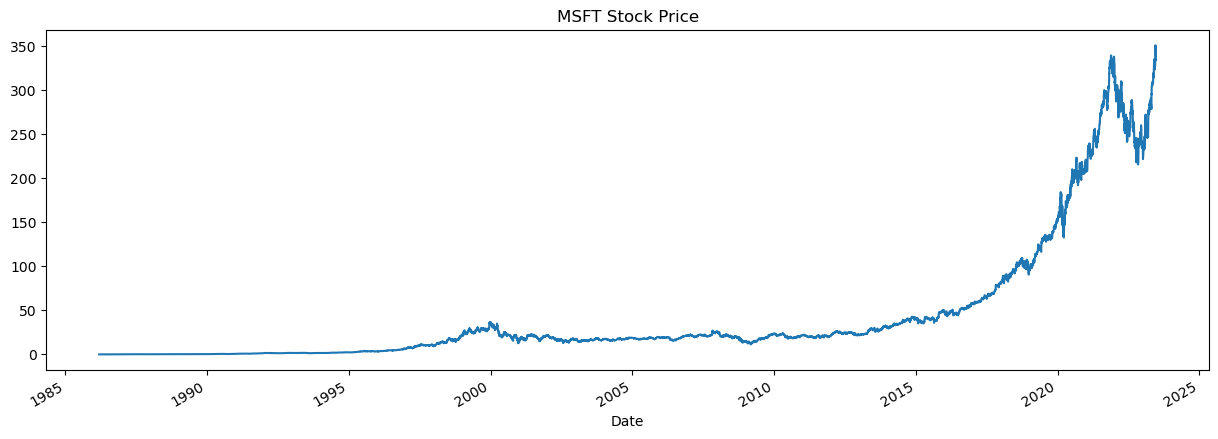

In [58]:
msft_history["Open"].plot(figsize=(15, 5), title="MSFT Stock Price")

In [38]:
msft.actions.head

<bound method NDFrame.head of                            Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2022-05-18 00:00:00-04:00       0.62           0.0
2022-08-17 00:00:00-04:00       0.62           0.0
2022-11-16 00:00:00-05:00       0.68           0.0
2023-02-15 00:00:00-05:00       0.68           0.0
2023-05-17 00:00:00-04:00       0.68           0.0

[87 rows x 2 columns]>

In [41]:
msft.splits.head

<bound method NDFrame.head of Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64>

In [44]:
# msft.earnings_dates

In [46]:
stocks = [
    "O",
    "ETSY",
    "CLX",
    "DPZ",
    "PFE",
    "PINS",
    "SQ",
    "SHOP",
    "LNG",
    "MELI",
    "ISRG",
    "DIS",
    "BRK",
    "AMZN",
    "ZM",
]

In [56]:
history_dict = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    history = ticker.history(period="5y")
    history_dict[stock] = history

In [57]:
history_dict.keys()

dict_keys(['O', 'ETSY', 'CLX', 'DPZ', 'PFE', 'PINS', 'SQ', 'SHOP', 'LNG', 'MELI', 'ISRG', 'DIS', 'BRK', 'AMZN', 'ZM'])

In [85]:
temp_df = history_dict["DPZ"].copy()
type(temp_df)
temp_df.head

<bound method NDFrame.head of                                  Open        High         Low       Close   
Date                                                                        
2018-06-25 00:00:00-04:00  277.816879  279.014714  262.910213  265.724243  \
2018-06-26 00:00:00-04:00  268.062848  272.055710  264.821030  269.146606   
2018-06-27 00:00:00-04:00  269.659997  271.095531  265.857282  267.587524   
2018-06-28 00:00:00-04:00  266.094952  269.393808  265.429495  268.176941   
2018-06-29 00:00:00-04:00  270.030816  270.344528  266.361181  268.253052   
...                               ...         ...         ...         ...   
2023-06-16 00:00:00-04:00  330.359985  342.700012  329.420013  331.410004   
2023-06-20 00:00:00-04:00  330.750000  331.839996  324.890015  325.540009   
2023-06-21 00:00:00-04:00  322.269989  325.750000  321.890015  323.109985   
2023-06-22 00:00:00-04:00  322.000000  323.440002  320.359985  321.040009   
2023-06-23 00:00:00-04:00  320.000000  321.040

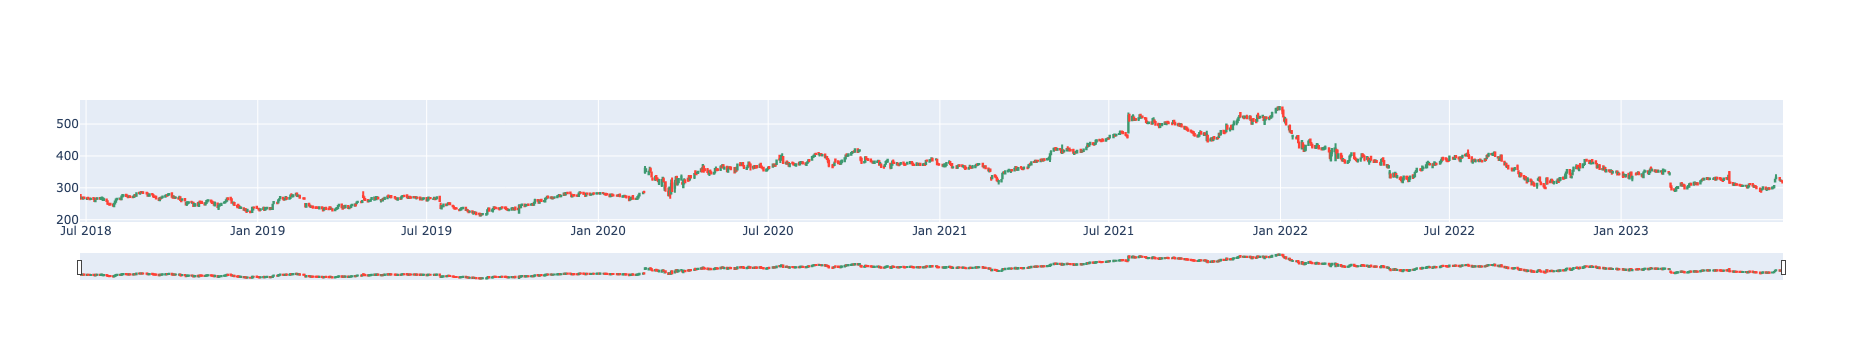

In [88]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=temp_df.index,
            open=temp_df["Open"],
            high=temp_df["High"],
            low=temp_df["Low"],
            close=temp_df["Close"],
        )
    ]
)
fig.show()

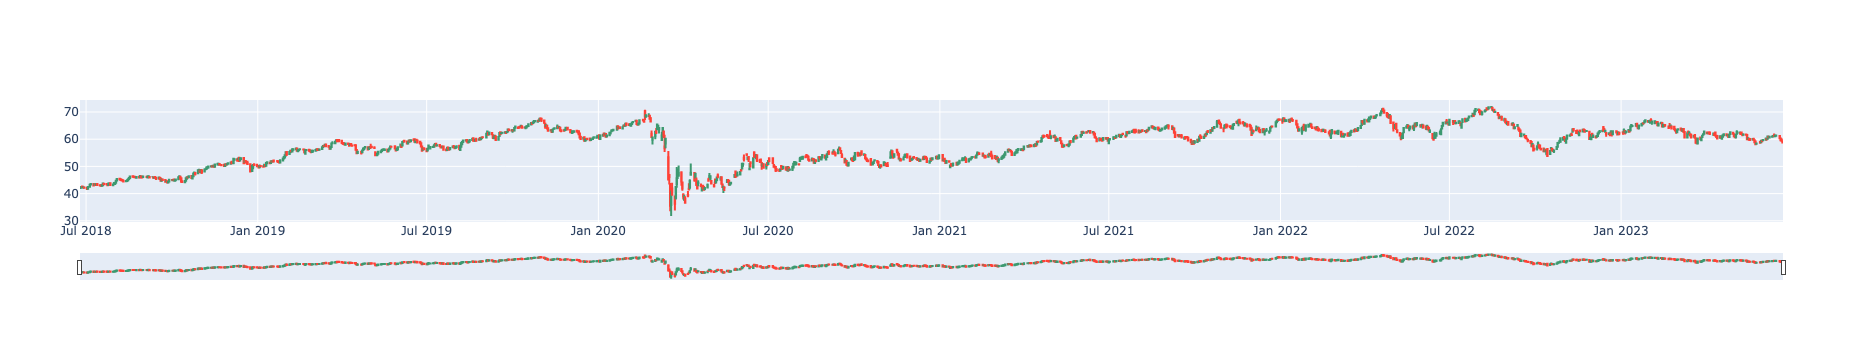

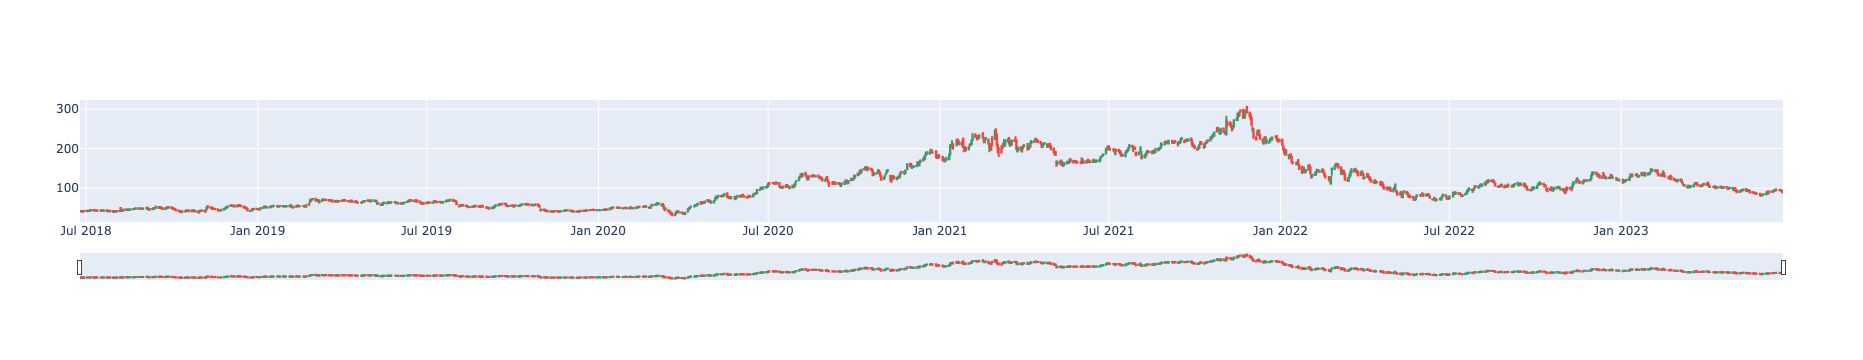

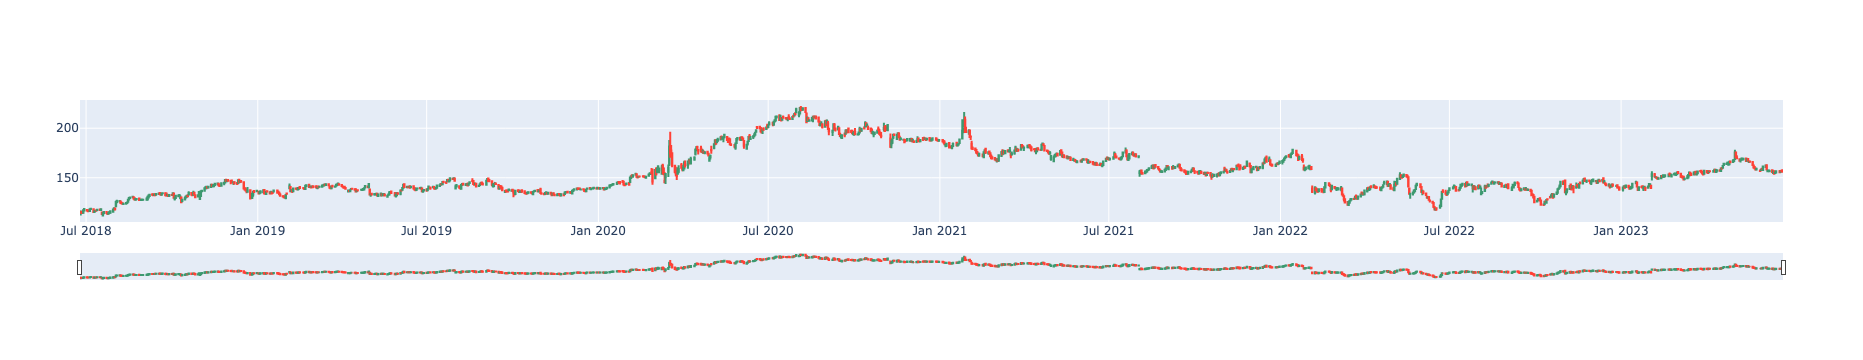

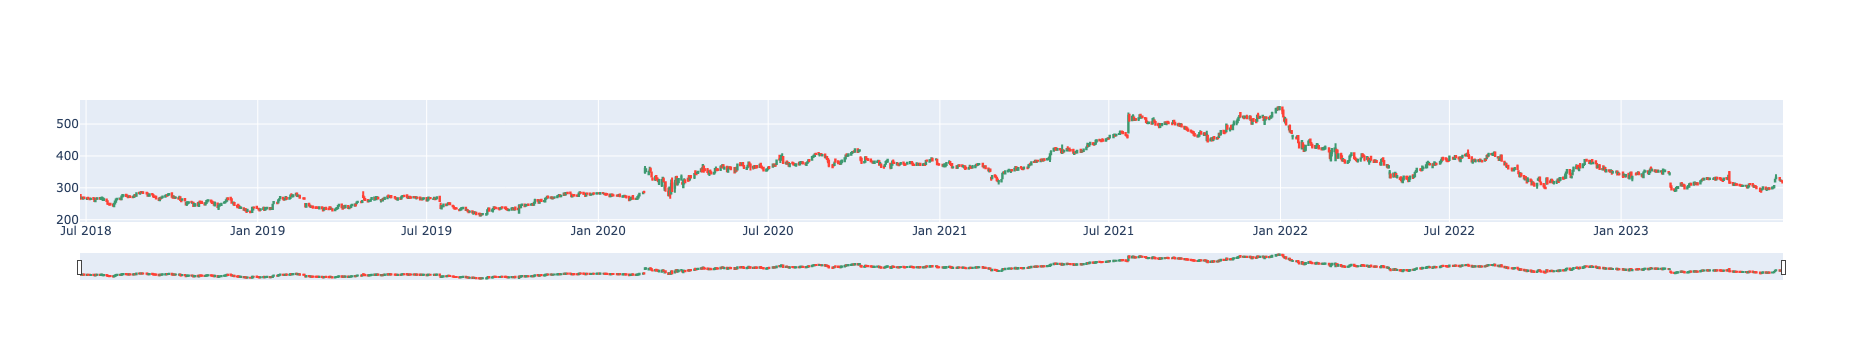

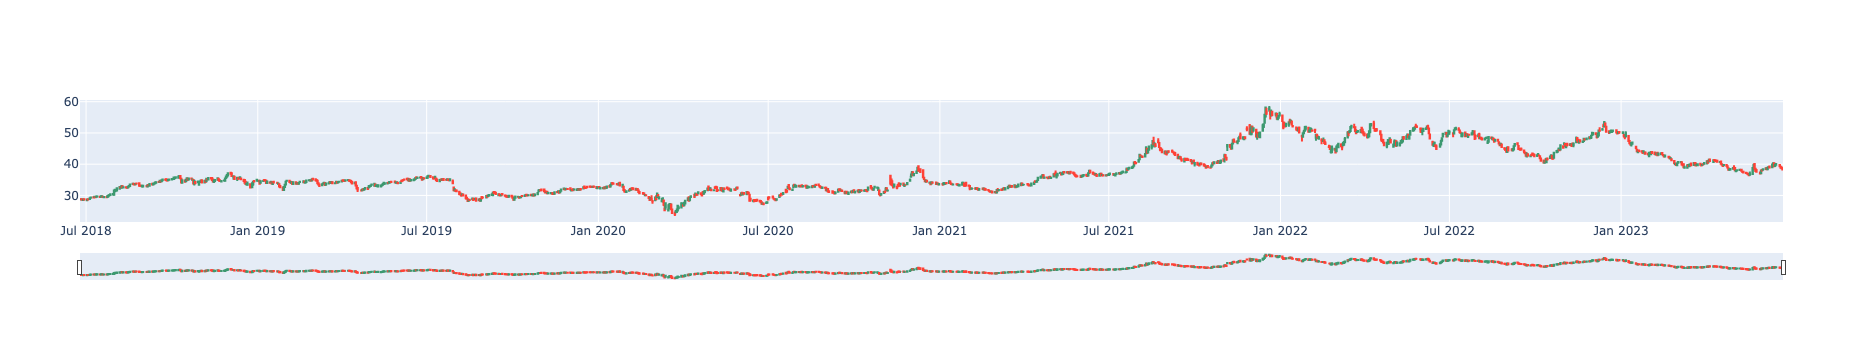

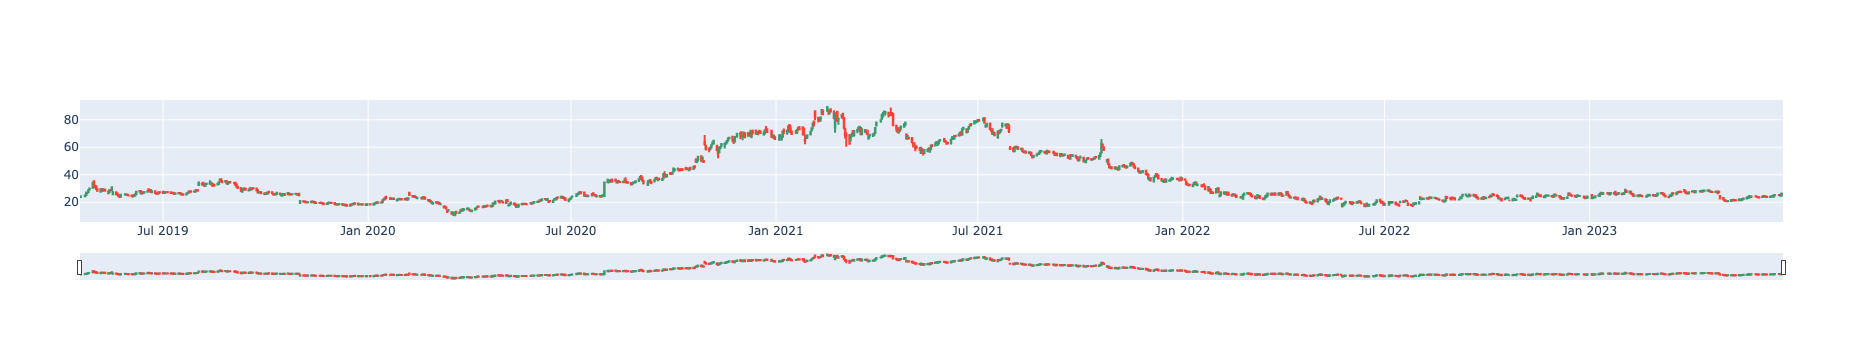

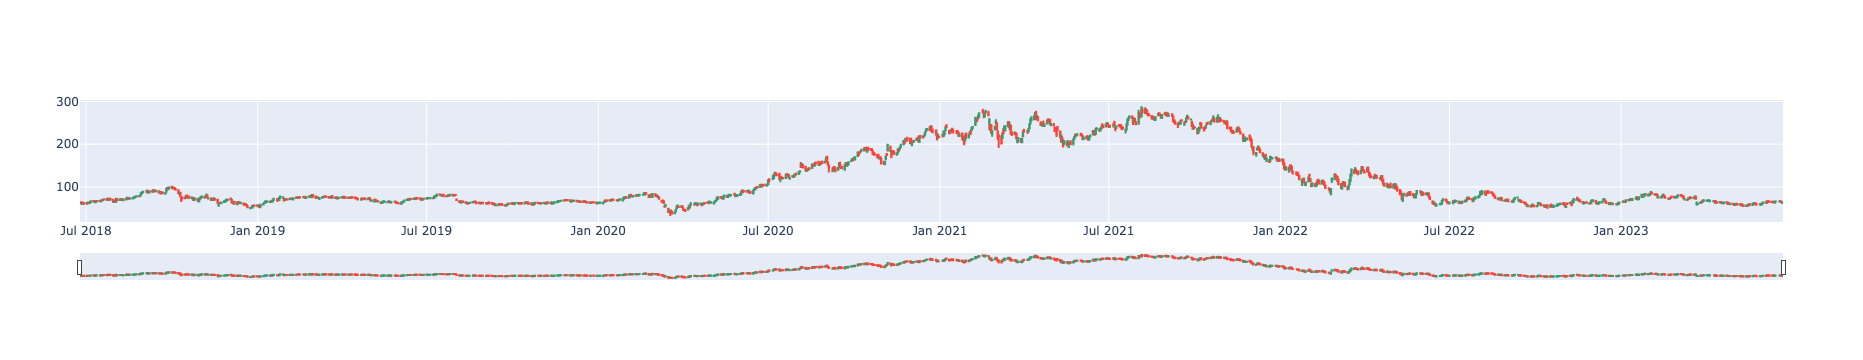

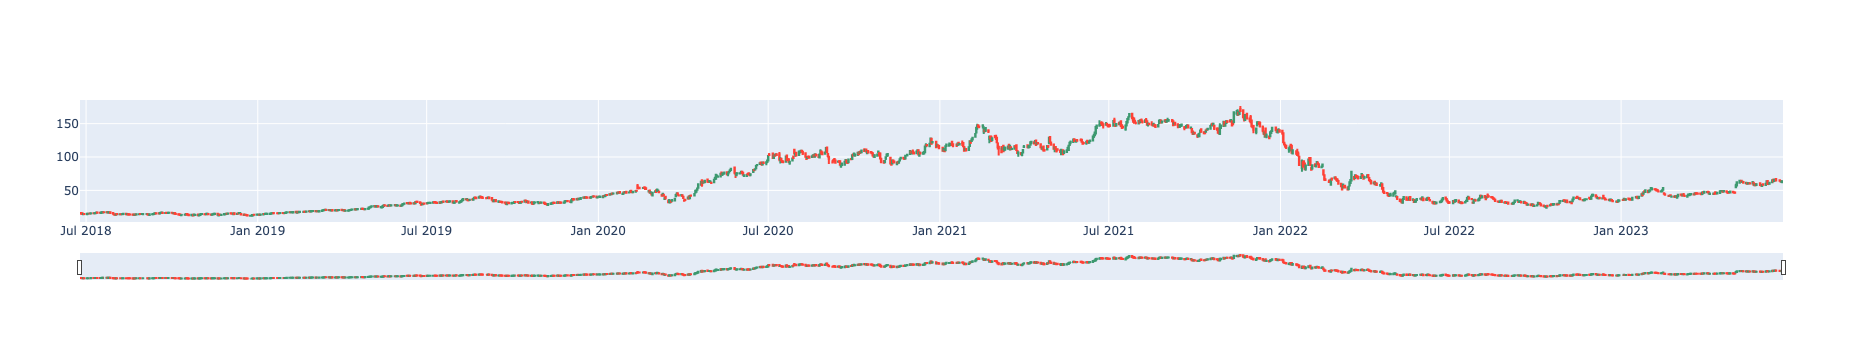

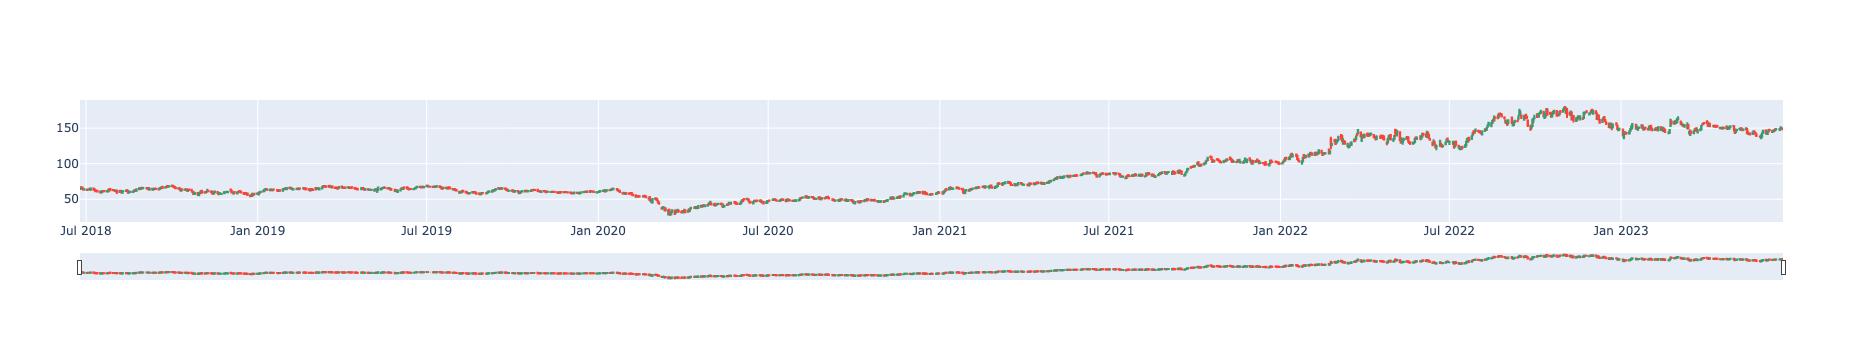

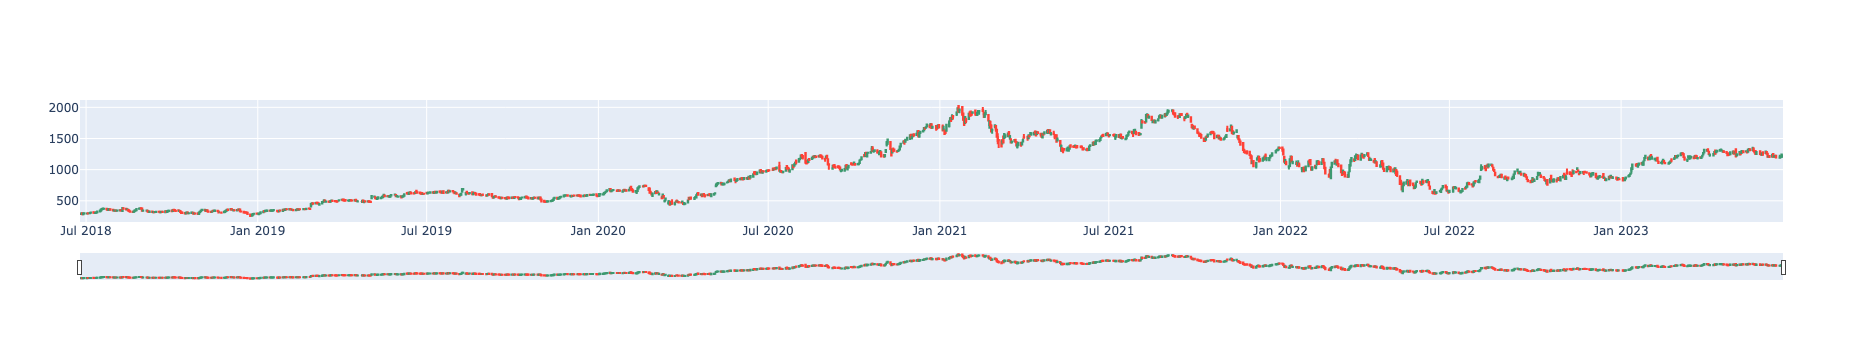

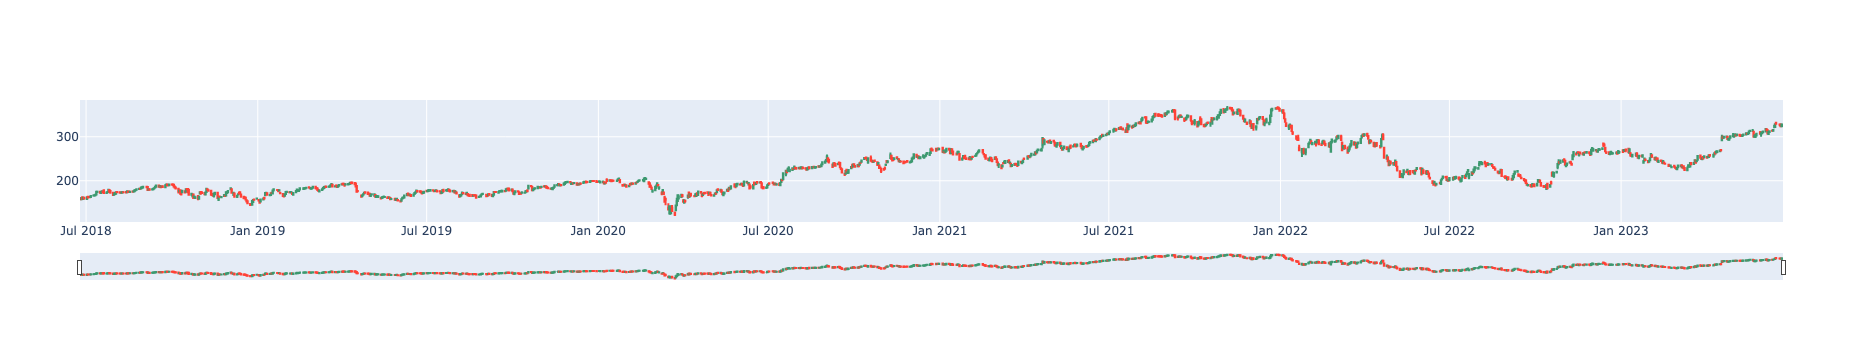

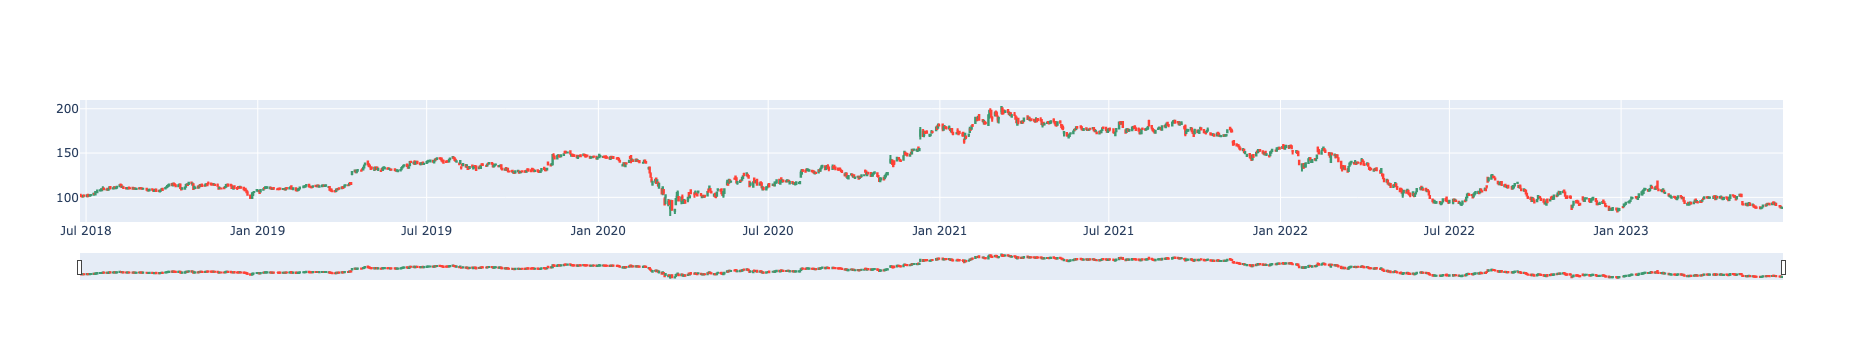

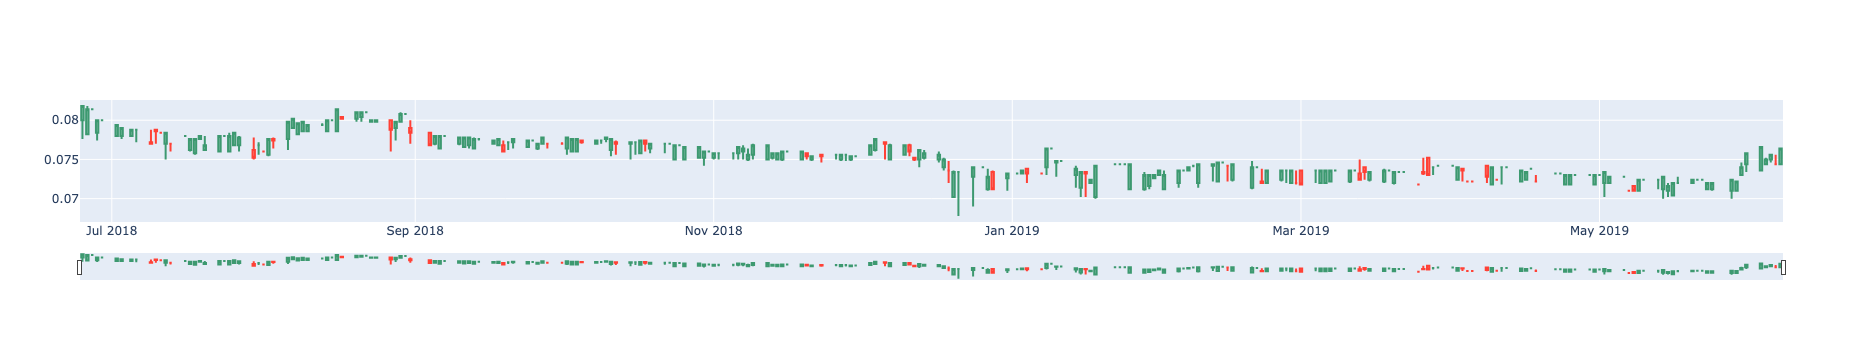

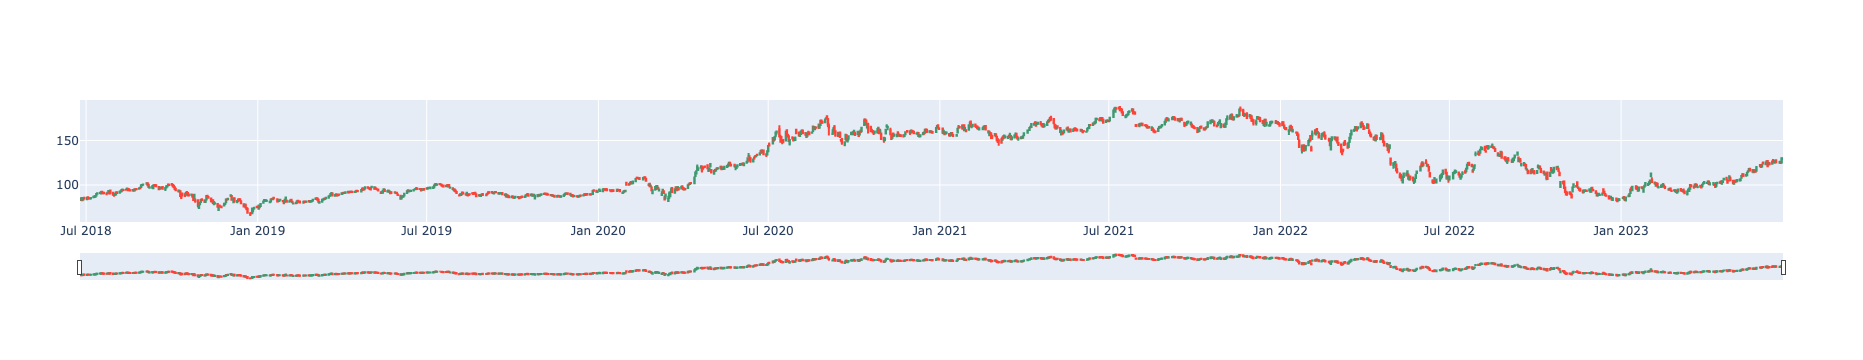

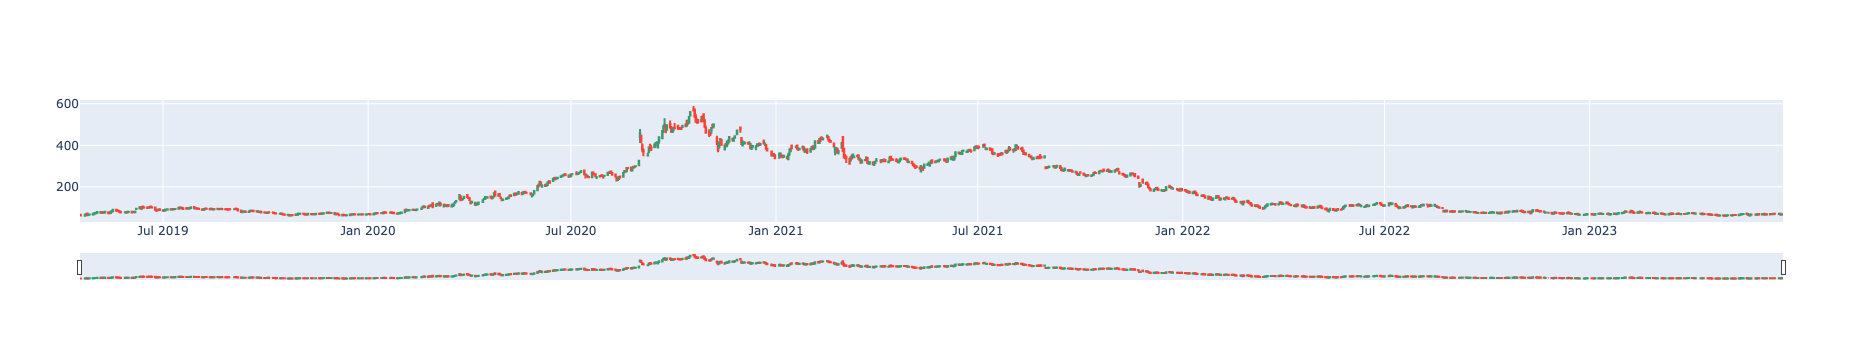

In [64]:
for stock in stocks:
    temp_df = history_dict[stock].copy()

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=temp_df.index,
                open=temp_df["Open"],
                high=temp_df["High"],
                low=temp_df["Low"],
                close=temp_df["Close"],
            )
        ]
    )

    # fig.update_layout(
    #     margin=dict(l=20, r=20, t=60, b=20),
    #     height=300,
    #     paper_bgcolor="LightSteelBlue",
    #     title=stock,
    # )

    fig.show()

In [62]:
# H1<br>
## H2 <br>
### H3 <br>
#### Header four <br>
##### Header five <br>
###### Header six <br>
Headerless <br>


**inline link**<br>
[Visit GitHub!](www.github.com) 

SyntaxError: invalid syntax (2307926549.py, line 7)

ERROR:root:Cannot parse: 7:15: Headerless <br>
Traceback (most recent call last):
  File "/Volumes/MEDIA/ohm/anaconda3/envs/pythonomy/lib/python3.10/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/Volumes/MEDIA/ohm/anaconda3/envs/pythonomy/lib/python3.10/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1079, in format_str
  File "src/black/__init__.py", line 1089, in _format_str_once
  File "src/black/parsing.py", line 127, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 7:15: Headerless <br>


In [89]:
!pip3 install snscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.5 MB/s eta 0:00:001.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached soupsieve-2.4.1-py3-none-any.whl (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 2.9 MB/s eta 0:00:00m eta 0:00:01
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 3.7 MB/s eta 0:00:00
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Created wheel for lxml: filename=lxml-4.9.2-cp311-cp311-macosx_13_0_x86_64.whl size=1798302 sha256=873bc676f8136bae387379c7cd814c7a92e2e6ea7c173b9e78e71438bc5277e2
  Stored in directory: /Volumes/MEDIA/ohm/Library/Caches/pip

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
stock = 'ENVX'

In [6]:
# Creating list to append tweet data
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2023-06-20 until:2023-06-21"
        ).get_items()
    ),
    total=1_0,
):  # declare a username
    if i > 1_0:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/q0/ffcxtwpj4mlf80yb38h7m03w0000gn/T/ipykernel_48020/1353122603.py:15: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  [tweet.date, tweet.id, tweet.content, tweet.user.username]
Skipping unrecognised entry ID: 'promoted-tweet-1669725812851875843-3818678746aa4a80'
Skipping unrecognised entry ID: 'promoted-tweet-1670730914727444484-38185b88b1ec3b33'
Skipping unrecognised entry ID: 'promoted-tweet-1670724564303720450-3818679ce549a76e'


In [3]:
snscrape

NameError: name 'snscrape' is not defined

In [4]:
snscrape --help

NameError: name 'snscrape' is not defined

In [5]:
2*3

6

In [8]:
#conda list